# Regression Explore Exercises

1.) Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle
import explore

In [2]:
null_hypothesis = "Customer tenure is independent of total charges"
alternative_hypothesis = "Customer tenure and total charges is not independent"

In [3]:
df = wrangle.wrangle_telco()

In [3]:
df.head()

,monthly_charges,tenure,total_charges
customer_id,,,
0002-ORFBO,65.60,9,593.30
0020-JDNXP,61.25,34,1993.20
0022-TCJCI,62.70,45,2791.50
0068-FIGTF,78.20,27,2078.95
0074-HDKDG,61.60,25,1611.00


In [5]:
#exploring univariate

In [4]:
x = df.tenure
y= df.total_charges

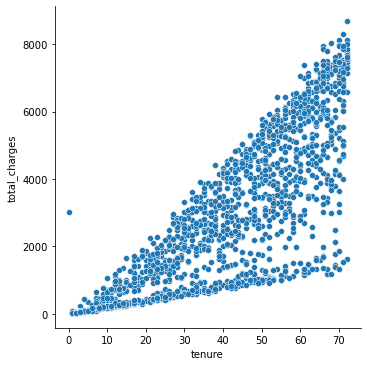

In [5]:
sns.relplot(x, y, kind = 'scatter') #I see an outlier for about 0 months with a total charge of ~3000?

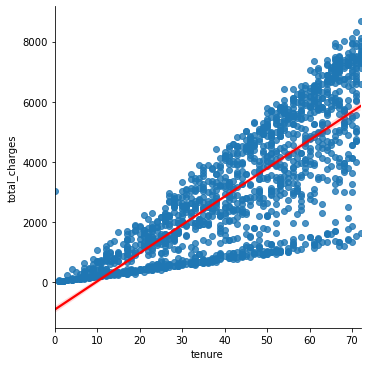

In [6]:
sns.lmplot(x="tenure", y="total_charges", data=df, line_kws={'color': 'red'})
plt.show()

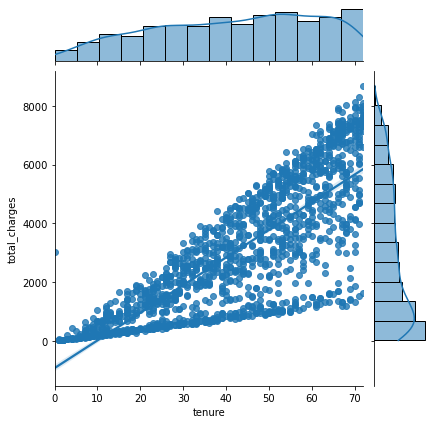

In [9]:
sns.jointplot(x="tenure", y="total_charges", data=df, kind='reg')
plt.show()

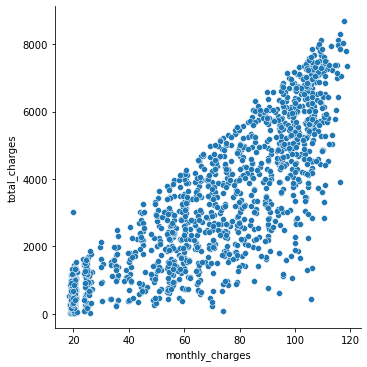

In [10]:
#exploring monthly_charges and total_charges (univariate)
#Outlier at about ~(20,3000)b
sns.relplot(x="monthly_charges", y="total_charges", data=df)
plt.show()

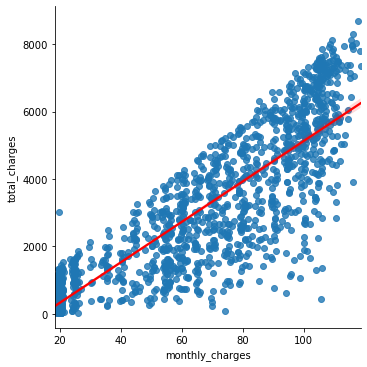

In [11]:
sns.lmplot(x="monthly_charges", y="total_charges", data=df, line_kws={'color': 'red'})
plt.show()

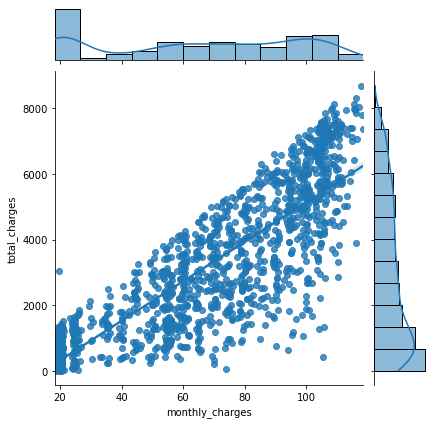

In [12]:
sns.jointplot(x="monthly_charges", y="total_charges", data=df, kind='reg')
plt.show()

Takeaways for Univariates:
 - As tenure increases, total charges increases. Sounds about right.
 - As monthly charges increases total charges increases.

<br>

### Explore with Split Data Sets

In [4]:
#bringing in split data
train, validate, test = wrangle.wrangle_split_telco()

In [5]:
#quality assurance
train.shape, validate.shape, test.shape

((824, 3), (354, 3), (295, 3))

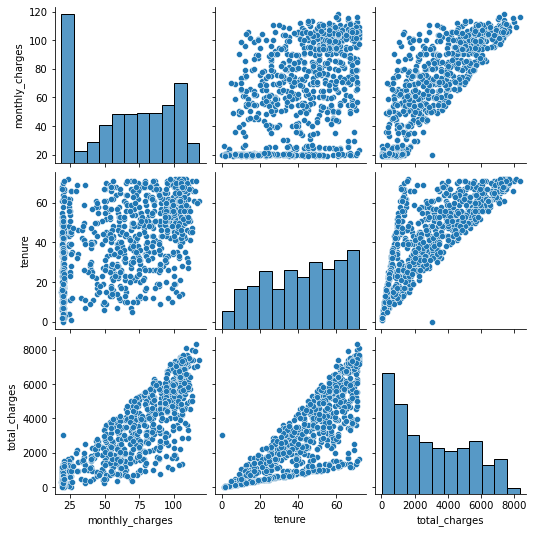

In [15]:
sns.pairplot(train)

<AxesSubplot:>

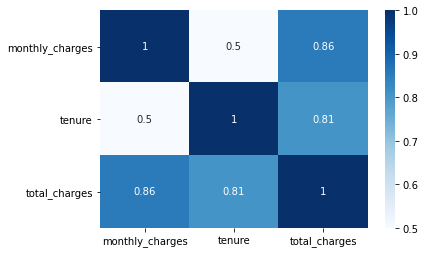

In [16]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

Takeaways for Bivariate Exploration:
 - Monthly charges and tenure and strong, positively correlated with total_charges
 - Tenure and monthly charges are +0.5 related, could be some relationship which contributes to total charges.

2.) Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.


In [7]:
from sklearn.model_selection import train_test_split

In [40]:
def plot_variable_pairs(df):
    sns.pairplot(df, corner = True, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

In [27]:
def plot_variable_pairs(df):
    '''accepts a dataframe as input
    split into train, validate, and test
    plots all of the pairwise relationships along with the regression line for each pair.'''
    plot = sns.PairGrid(df)
    plot.map(sns.regplot)
    return plot

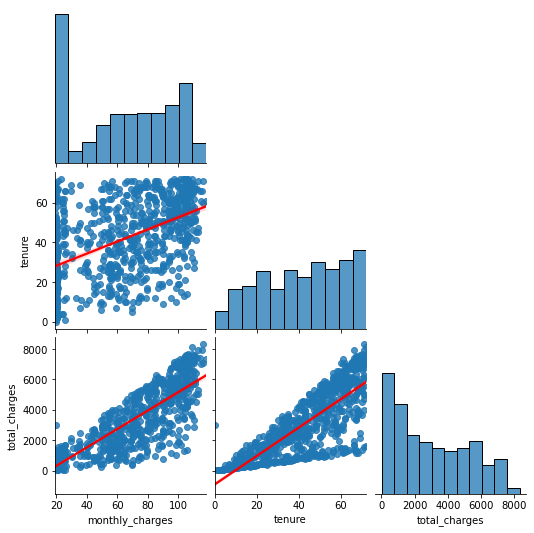

In [41]:
plot_variable_pairs(train)

3.) Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [69]:
def months_to_years(df):
    df = wrangle.wrangle_telco()
    df['tenure_years'] = df.tenure//12
    return df

In [70]:
df = months_to_years(df)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1473 entries, 0002-ORFBO to 9891-NQDBD
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1473 non-null   float64
 1   tenure           1473 non-null   int64  
 2   total_charges    1473 non-null   float64
 3   tenure_years     1473 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 57.5+ KB


4.) Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [36]:
train.select_dtypes('float64').columns.tolist()

['monthly_charges', 'total_charges']

In [45]:
quant_vars = df.select_dtypes('float64').columns.tolist()
cat_vars = df.select_dtypes('int64', 'object').columns.tolist()

In [51]:
quant_vars

['monthly_charges', 'total_charges']

In [50]:
cat_vars

['tenure', 'tenure_years']

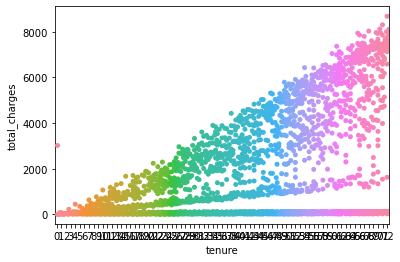

In [54]:
for col in quant_vars:
    sns.swarmplot(x=cat_vars[0], y=col, data=df)

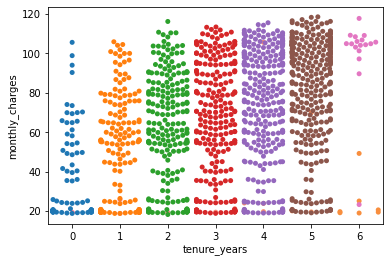

In [49]:
for i in cat_vars:
    sns.swarmplot(x=i, y=quant_vars[0], data=df)

In [ ]:
def swarm

In [35]:
def plot_categorical_and_continuous_vars(df):
    quant_vars = df.select_dtypes('float64').columns.tolist()
    cat_vars = df.select_dtypes('int64', 'object').columns.tolist()
    cat_vars_len = len(cat_vars)
    swarm = sns.swarmplot(x=cat_vars, y=quant_vars, data=df)

In [52]:
cat_vars_len = len(cat_vars)

In [53]:
cat_vars_len

2

In [67]:
def plot_categorical_and_continuous_vars(df, cat_vars, quant_vars):
    sns.barplot(data=df, y=quant_vars, x=cat_vars)
    plt.show()
    sns.violinplot(data=df, y=quant_vars, x=cat_vars)
    plt.show()
    sns.boxplot(data=df, y=quant_vars, x=cat_vars)

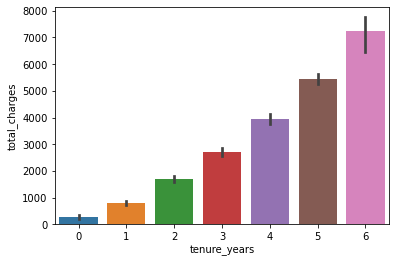

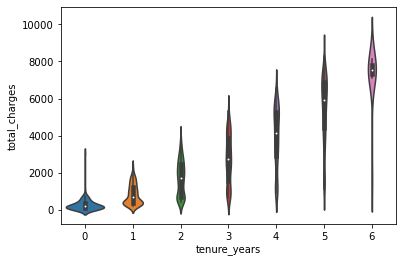

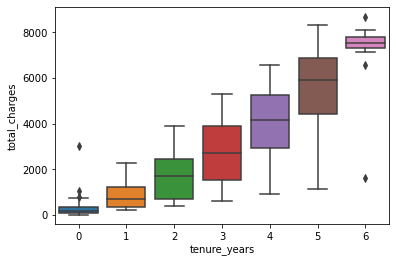

In [71]:
plot_categorical_and_continuous_vars(df, 'tenure_years', 'total_charges')

5.) Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

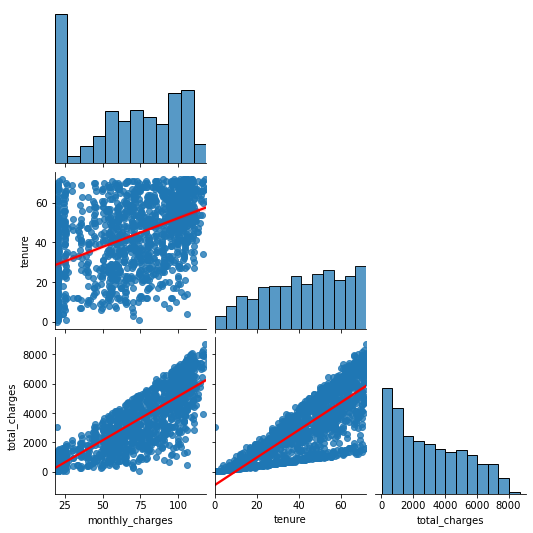

In [6]:
explore.plot_variable_pairs(df)

In [13]:
explore.months_to_years(train)

,monthly_charges,tenure,total_charges,tenure_years
customer_id,,,,
6674-KVJHG,25.20,11,245.15,0
4291-HYEBC,39.10,28,1096.60,2
2073-QBVBI,35.45,41,1391.65,3
0326-VDYXE,97.65,70,6982.50,5
9732-OUYRN,19.00,49,918.70,4
...,...,...,...,...
2056-EVGZL,105.75,68,7322.50,5
8865-TNMNX,49.55,10,475.70,0
3511-APPBJ,99.95,23,2292.75,1


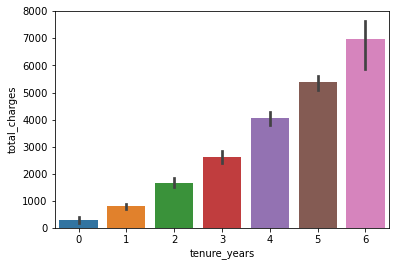

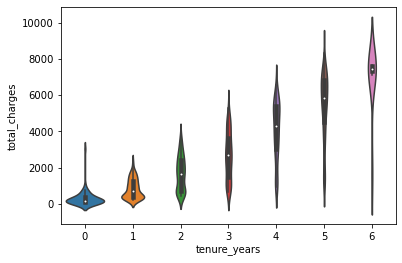

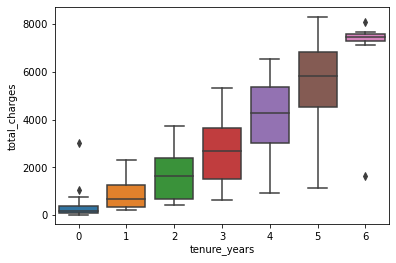

In [14]:
explore.plot_categorical_and_continuous_vars(train, 'tenure_years', 'total_charges')

6.) Explore your dataset with any other visualizations you think will be helpful.

<AxesSubplot:xlabel='tenure_years', ylabel='total_charges'>

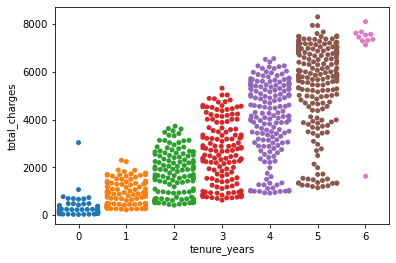

In [15]:
sns.swarmplot(x='tenure_years', y='total_charges', data=train)

7.) In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

In [ ]:
#